In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics

# Information: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

Our Data set is contains 4 different index:
> Government response --> All indicators				
> Containment and health --> All indicator except E1, E2				
> Stringency --> C indicators and H1					
> Economic support --> E!, E2

3 Indicators split into 16 sub-indicators: ()
C - containment and closure policies 
> C1	school_closing   3 (0, 1, 2, 3)
> C2	workplace_closing  3 (0, 1, 2, 3)                 
> C3	cancel_public_events 2 (0, 1, 2)
> C4	restrictions_on_gatherings 	4 (0, 1, 2, 3, 4)
> C5	close_public_transport  2 (0, 1, 2)
> C6	stay_at_home_requirements  3 (0, 1, 2, 3)
> C7	Restrictions on internal movement 2 (0, 1, 2)
> C8	International travel controls 	4 (0, 1, 2, 3, 4)

E - economic policies
> E1	Income support 2 (0, 1, 2)
> E2    Debt/contract relief 2 (0, 1, 2)

H - health system policies
> H1	Public information campaigns 2 (0, 1, 2)
> H2	Testing policy   3 (0, 1, 2, 3)
> H3	Contact tracing  2 (0, 1, 2)
> H6	Facial coverings 	4 (0, 1, 2, 3, 4)
> H7	Vaccination policy 5 (0, 1, 2, 3, 4, 5)
> H8    Protection of elderly people  3 (0, 1, 2, 3)


In [2]:
# Data Frame

Indicators_frame = {'Gov. response' : ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                    'Containment and health' : ['x','x','x','x','x','x','x','x','-','-','x','x','x','x','x','x'],
                    'Stringency' : ['x','x','x','x','x','x','x','x','-','-','x','-','-','-','-','-'],
                    'Economic support' : ['-','-','-','-','-','-','-','-','x','x','-','-','-','-','-','-'],
                    'Indicators': ['c1','c2','c3','c4','c5','c6','c7','c8','e1','e2','h1','h2','h3','h6','h7','h8'],
                    'Indicator Meaning': ['School_closing',
                                        'Workplace closing',
                                        'Cancel public events',
                                        'Restrictions on gatherings',
                                        'Close public transport',
                                        'Stay at home requirements',
                                        'Restrictions on internal movement',
                                        'International travel controls',
                                        'Income support',
                                        'Debt/contract relief',
                                        'Public information campaigns',
                                        'Testing policy',
                                        'Contact tracing',
                                        'Facial coverings',
                                        'Vaccination policy',
                                        'Protection of elderly people'],
                    'Max. value (Nj)' : ['3 (0, 1, 2, 3)','3 (0, 1, 2, 3)','2 (0, 1, 2)','4 (0, 1, 2, 3, 4)','2 (0, 1, 2)',
                                    '3 (0, 1, 2, 3)','2 (0, 1, 2)','4 (0, 1, 2, 3, 4)','2 (0, 1, 2)','2 (0, 1, 2)',
                                    '2 (0, 1, 2)','3 (0, 1, 2, 3)','2 (0, 1, 2)','4 (0, 1, 2, 3, 4)',
                                    '5 (0, 1, 2, 3, 4, 5)','3 (0, 1, 2, 3)']
}

In [3]:
Indicators_frame = pd.DataFrame(Indicators_frame)
Indicators_frame

,Gov. response,Containment and health,Stringency,Economic support,Indicators,Indicator Meaning,Max. value (Nj)
0,x,x,x,-,c1,School_closing,"3 (0, 1, 2, 3)"
1,x,x,x,-,c2,Workplace closing,"3 (0, 1, 2, 3)"
2,x,x,x,-,c3,Cancel public events,"2 (0, 1, 2)"
3,x,x,x,-,c4,Restrictions on gatherings,"4 (0, 1, 2, 3, 4)"
4,x,x,x,-,c5,Close public transport,"2 (0, 1, 2)"
5,x,x,x,-,c6,Stay at home requirements,"3 (0, 1, 2, 3)"
6,x,x,x,-,c7,Restrictions on internal movement,"2 (0, 1, 2)"
7,x,x,x,-,c8,International travel controls,"4 (0, 1, 2, 3, 4)"
8,x,-,-,x,e1,Income support,"2 (0, 1, 2)"
9,x,-,-,x,e2,Debt/contract relief,"2 (0, 1, 2)"


In [4]:
# Vacination Dataset
url_vaccination = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
url_ages = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv'


In [5]:
# Index URLs
url_index_strigency = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/stringency_index_avg.csv'
url_index_gov_response = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/government_response_index_avg.csv'
url_index_health = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/containment_health_index_avg.csv'
url_index_economic = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/economic_support_index.csv'

# Indicators URLs
# C sub-indicators
url_c1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c1m_school_closing.csv'
url_c2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c2m_workplace_closing.csv'
url_c3 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c3m_cancel_public_events.csv'
url_c4 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c4m_restrictions_on_gatherings.csv'
url_c5 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c5m_close_public_transport.csv'
url_c6 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c6m_stay_at_home_requirements.csv'
url_c7 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c7m_movementrestrictions.csv'
url_c8 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c8ev_internationaltravel.csv'

# E sub-indicators
url_e1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e1_income_support.csv'
url_e2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e2_debtrelief.csv'

# H sub-indicators
url_h1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h1_public_information_campaigns.csv'
url_h2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h2_testing_policy.csv'
url_h3 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h3_contact_tracing.csv'
url_h6 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h6m_facial_coverings.csv'
url_h7 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h7_vaccination_policy.csv'
url_h8 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h8m_protection_of_elderly_ppl.csv'

# Target URLs
url_cases = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_cases.csv'
url_deaths = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_deaths.csv'

In [6]:
# DataFrame Index
df_strigency_raw = pd.read_csv(url_index_strigency)
df_gov_response_raw = pd.read_csv(url_index_gov_response)
df_health_raw = pd.read_csv(url_index_health)
df_economic_raw = pd.read_csv(url_index_economic)

In [7]:
# DataFrames Indicator
df_c1_raw = pd.read_csv(url_c1)
df_c2_raw = pd.read_csv(url_c2)
df_c3_raw = pd.read_csv(url_c3)
df_c4_raw = pd.read_csv(url_c4)
df_c5_raw = pd.read_csv(url_c5)
df_c6_raw = pd.read_csv(url_c6)
df_c7_raw = pd.read_csv(url_c7)
df_c8_raw = pd.read_csv(url_c8)

df_e1_raw = pd.read_csv(url_e1)
df_e2_raw = pd.read_csv(url_e2)

df_h1_raw = pd.read_csv(url_h1)
df_h2_raw = pd.read_csv(url_h2)
df_h3_raw = pd.read_csv(url_h3)
df_h6_raw = pd.read_csv(url_h6)
df_h7_raw = pd.read_csv(url_h7)
df_h8_raw = pd.read_csv(url_h8)

In [8]:
# Data Frame target
df_cases_raw = pd.read_csv(url_cases)
df_deaths_raw = pd.read_csv(url_deaths)

In [9]:
# Vaccination
df_vaccination_raw = pd.read_csv(url_vaccination)
df_ages_raw = pd.read_csv(url_ages)

In [10]:
# Cleaninng Index Features

drop_columns = ['Unnamed: 0','country_code','region_code','region_name','jurisdiction']

df_gov_response = df_gov_response_raw.drop(columns = drop_columns)
df_gov_response.set_index(keys='country_name', inplace=True)
df_gov_response = df_gov_response.T
df_gov_response = df_gov_response.fillna(0)

df_health = df_health_raw.drop(columns = drop_columns)
df_health.set_index(keys='country_name', inplace=True)
df_health = df_health.T
df_health = df_health.fillna(0)

df_strigency = df_strigency_raw.drop(columns = drop_columns)
df_strigency.set_index(keys='country_name', inplace=True)
df_strigency = df_strigency.T
df_strigency = df_strigency.fillna(0)

df_economic = df_economic_raw.drop(columns = drop_columns)
df_economic.set_index(keys='country_name', inplace=True)
df_economic = df_economic.T
df_economic = df_economic.fillna(0)

In [11]:
df_c1 = df_c1_raw.copy()
df_c1 = df_c1.drop(columns = drop_columns)
df_c1.set_index(keys='country_name', inplace=True)
df_c1 = df_c1.T

df_c2 = df_c2_raw.copy()
df_c2 = df_c2.drop(columns = drop_columns)
df_c2.set_index(keys='country_name', inplace=True)
df_c2 = df_c2.T

df_c3 = df_c3_raw.copy()
df_c3 = df_c3.drop(columns = drop_columns)
df_c3.set_index(keys='country_name', inplace=True)
df_c3 = df_c3.T

df_c4 = df_c4_raw.copy()
df_c4 = df_c4.drop(columns = drop_columns)
df_c4.set_index(keys='country_name', inplace=True)
df_c4 = df_c4.T

df_c5 = df_c5_raw.copy()
df_c5 = df_c5.drop(columns = drop_columns)
df_c5.set_index(keys='country_name', inplace=True)
df_c5 = df_c5.T

df_c6 = df_c6_raw.copy()
df_c6 = df_c6.drop(columns = drop_columns)
df_c6.set_index(keys='country_name', inplace=True)
df_c6 = df_c6.T

df_c7 = df_c7_raw.copy()
df_c7 = df_c7.drop(columns = drop_columns)
df_c7.set_index(keys='country_name', inplace=True)
df_c7 = df_c7.T

df_c8 = df_c8_raw.copy()
df_c8 = df_c8.drop(columns = drop_columns)
df_c8.set_index(keys='country_name', inplace=True)
df_c8 = df_c8.T

df_e1 = df_e1_raw.copy()
df_e1 = df_e1.drop(columns = drop_columns)
df_e1.set_index(keys='country_name', inplace=True)
df_e1 = df_e1.T

df_e2 = df_e2_raw.copy()
df_e2 = df_e2.drop(columns = drop_columns)
df_e2.set_index(keys='country_name', inplace=True)
df_e2 = df_e2.T

df_h1 = df_h1_raw.copy()
df_h1 = df_h1.drop(columns = drop_columns)
df_h1.set_index(keys='country_name', inplace=True)
df_h1 = df_h1.T

df_h2 = df_h2_raw.copy()
df_h2 = df_h2.drop(columns = drop_columns)
df_h2.set_index(keys='country_name', inplace=True)
df_h2 = df_h2.T

df_h3 = df_h3_raw.copy()
df_h3 = df_h3.drop(columns = drop_columns)
df_h3.set_index(keys='country_name', inplace=True)
df_h3 = df_h3.T

df_h6 = df_h6_raw.copy()
df_h6 = df_h6.drop(columns = drop_columns)
df_h6.set_index(keys='country_name', inplace=True)
df_h6 = df_h6.T

df_h7 = df_h7_raw.copy()
df_h7 = df_h7.drop(columns = drop_columns)
df_h7.set_index(keys='country_name', inplace=True)
df_h7 = df_h7.T

df_h8 = df_h8_raw.copy()
df_h8 = df_h8.drop(columns = drop_columns)
df_h8.set_index(keys='country_name', inplace=True)
df_h8 = df_h8.T

In [12]:
# Cleaning Vaccination Features
df_vaccination = df_vaccination_raw.copy()
df_vaccination = df_vaccination[['date','location','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred']]

In [13]:
# Cleaninng Target

# Cases per country
df_cases = df_cases_raw.drop(columns = drop_columns)
df_cases.set_index(keys='country_name', inplace=True)
df_cases = df_cases.T
df_cases = df_cases.fillna(0)

# Deaths per country
df_deaths = df_deaths_raw.drop(columns = drop_columns)
df_deaths.set_index(keys='country_name', inplace=True)
df_deaths = df_deaths.T
df_deaths = df_deaths.fillna(0)

In [14]:
country = 'Australia'

def country_output(country):


    # INDEX FEATURES
    country_index = df_gov_response.copy()
    country_index = pd.DataFrame(country_index[[country]].iloc[:,0])
    country_index.index.name = country
    country_index.columns = ['gov_response']
    country_index['containment_and_health'] = df_health[[country]].iloc[:,0]
    country_index['stringency'] = df_strigency[[country]].iloc[:,0]
    country_index['economics_sup'] = df_economic[[country]].iloc[:,0]

    # INDICATOR FEATRUES
    df = pd.DataFrame(df_c1[[country]].rename(columns = {country:'school_closing'}).iloc[:,0])
    df.index.name = country
    df['workplace_closing'] = df_c2[[country]].iloc[:,0]
    df['cancel_public_events'] = df_c3[[country]].iloc[:,0]
    df['restrictions_on_gatherings'] = df_c4[[country]].iloc[:,0]
    df['close_public_transport'] = df_c5[[country]].iloc[:,0]
    df['stay_at_home_requirements'] = df_c6[[country]].iloc[:,0]
    df['restrictions_on_internal_movement'] = df_c7[[country]].iloc[:,0]
    df['international_travel_controls'] = df_c8[[country]].iloc[:,0]
    df['income_support'] = df_e1[[country]].iloc[:,0]
    df['debt/contract_relief'] = df_e2[[country]].iloc[:,0]
    df['public_information_campaigns'] = df_h1[[country]].iloc[:,0]
    df['testing_policy'] = df_h2[[country]].iloc[:,0]
    df['contact_tracing'] = df_h3[[country]].iloc[:,0]
    df['facial_coverings'] = df_h6[[country]].iloc[:,0]
    df['vaccination_policy'] = df_h7[[country]].iloc[:,0]
    df['protection_of_elderly_people'] = df_h8[[country]].iloc[:,0]
    df = df.fillna(method = 'ffill')
    country_indicator = df
    
    # POPULATION VACCINATED

    country_vaccination = df_vaccination.loc[df_vaccination['location']==country]
    country_vaccination = country_vaccination.fillna(method='ffill').drop(columns = 'location')
    country_vaccination.index.name = country
    country_vaccination = country_vaccination.fillna(0)

    # TARGET
    country_target = df_cases.copy()
    country_target = pd.DataFrame(country_target[[country]].iloc[:,0])
    country_target.index.name = country
    country_target.columns = ['total_cases']
    country_target['new_cases'] = country_target - country_target.shift(1)
    country_target['total_deaths'] = df_deaths[[country]].iloc[:,0]
    country_target['new_deaths'] = df_deaths[[country]].iloc[:,0] - df_deaths[[country]].iloc[:,0].shift(1)

    country_target['new_cases'].loc[country_target['new_cases'] < 0] = 0
    country_target['new_deaths'].loc[country_target['new_deaths'] < 0] = 0

    # Days no update counter
    def non_uptade(country_target):

        counter = 0
        x = 1
        while country_target['total_deaths'][-x] == 0:
            counter += 1
            x += 1
            
        return counter
    
    counter = non_uptade(country_target)

    # Last Update Data
    country_index = country_index[:-counter]
    country_indicator = country_indicator[:-counter]
    country_vaccination = country_vaccination[:-counter]
    country_target = country_target[:-counter]
    
    # JOIN INDEX-TARGET AND INDICATOR-TARGET
    country_index = country_index.join(country_target)
    
    country_indicator = country_indicator.join(country_target)
    
    # JOIN INDEX AND VACCINATION
    country_vaccination.reset_index(inplace=True)
    country_vaccination['date'] = pd.to_datetime(country_vaccination['date'])

    country_index.reset_index(inplace=True)
    country_index[country] = country_index[country].apply(lambda x: pd.to_datetime( x, format='%y%b%d', infer_datetime_format=True))
    
    country_index.rename(columns = {country: 'date'}, inplace = True)
    country_index = country_index.merge(country_vaccination, how = 'left' , on = 'date')

    country_index.fillna(method = 'ffill', inplace=True)
    country_index.fillna(0, inplace=True)
    country_index.drop(columns = country, inplace=True)
    
    # JOIN INDICATOR AND VACCINATION

    country_indicator.reset_index(inplace=True)
    country_indicator[country] = country_indicator[country].apply(lambda x: pd.to_datetime( x, format='%y%b%d', infer_datetime_format=True))

    country_indicator.rename(columns = {country: 'date'}, inplace = True)
    country_indicator = country_indicator.merge(country_vaccination, how = 'left' , on = 'date')

    country_indicator.fillna(method = 'ffill', inplace=True)
    country_indicator.fillna(0, inplace=True)
    country_indicator.drop(columns = country, inplace=True)
    
    # Days free of covid
    country_index = country_index.loc[country_index['total_cases'] > 0].reset_index(drop=True)
    country_indicator = country_indicator.loc[country_indicator['total_cases'] > 0].reset_index(drop=True)
    
    return country_index, country_indicator

country_index, country_indicator = country_output(country)

In [15]:
country_index

,date,gov_response,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,2020-01-26,11.46,13.10,5.56,0.0,4.0,4.0,0.0,0.0,0.00,0.00,0.00
1,2020-01-27,11.46,13.10,5.56,0.0,5.0,1.0,0.0,0.0,0.00,0.00,0.00
2,2020-01-28,11.46,13.10,5.56,0.0,5.0,0.0,0.0,0.0,0.00,0.00,0.00
3,2020-01-29,11.46,13.10,5.56,0.0,6.0,1.0,0.0,0.0,0.00,0.00,0.00
4,2020-01-30,11.46,13.10,5.56,0.0,9.0,3.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
953,2022-09-05,30.47,34.82,11.11,0.0,10083201.0,10314.0,14145.0,68.0,86.52,83.97,54.86
954,2022-09-06,30.47,0.00,0.00,0.0,10095000.0,11799.0,14214.0,69.0,86.53,83.98,54.87
955,2022-09-07,30.47,0.00,0.00,0.0,10103268.0,8268.0,14275.0,61.0,86.53,83.98,54.87
956,2022-09-08,30.47,0.00,0.00,0.0,10111190.0,7922.0,14359.0,84.0,86.53,83.98,54.87


In [16]:
country_indicator

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,...,facial_coverings,vaccination_policy,protection_of_elderly_people,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.00,0.00,0.00
1,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.00,0.00,0.00
2,2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.00,0.00,0.00
3,2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.00,0.00,0.00
4,2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2022-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,2.0,10083201.0,10314.0,14145.0,68.0,86.52,83.97,54.86
954,2022-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,2.0,10095000.0,11799.0,14214.0,69.0,86.53,83.98,54.87
955,2022-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,2.0,10103268.0,8268.0,14275.0,61.0,86.53,83.98,54.87
956,2022-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,2.0,10111190.0,7922.0,14359.0,84.0,86.53,83.98,54.87


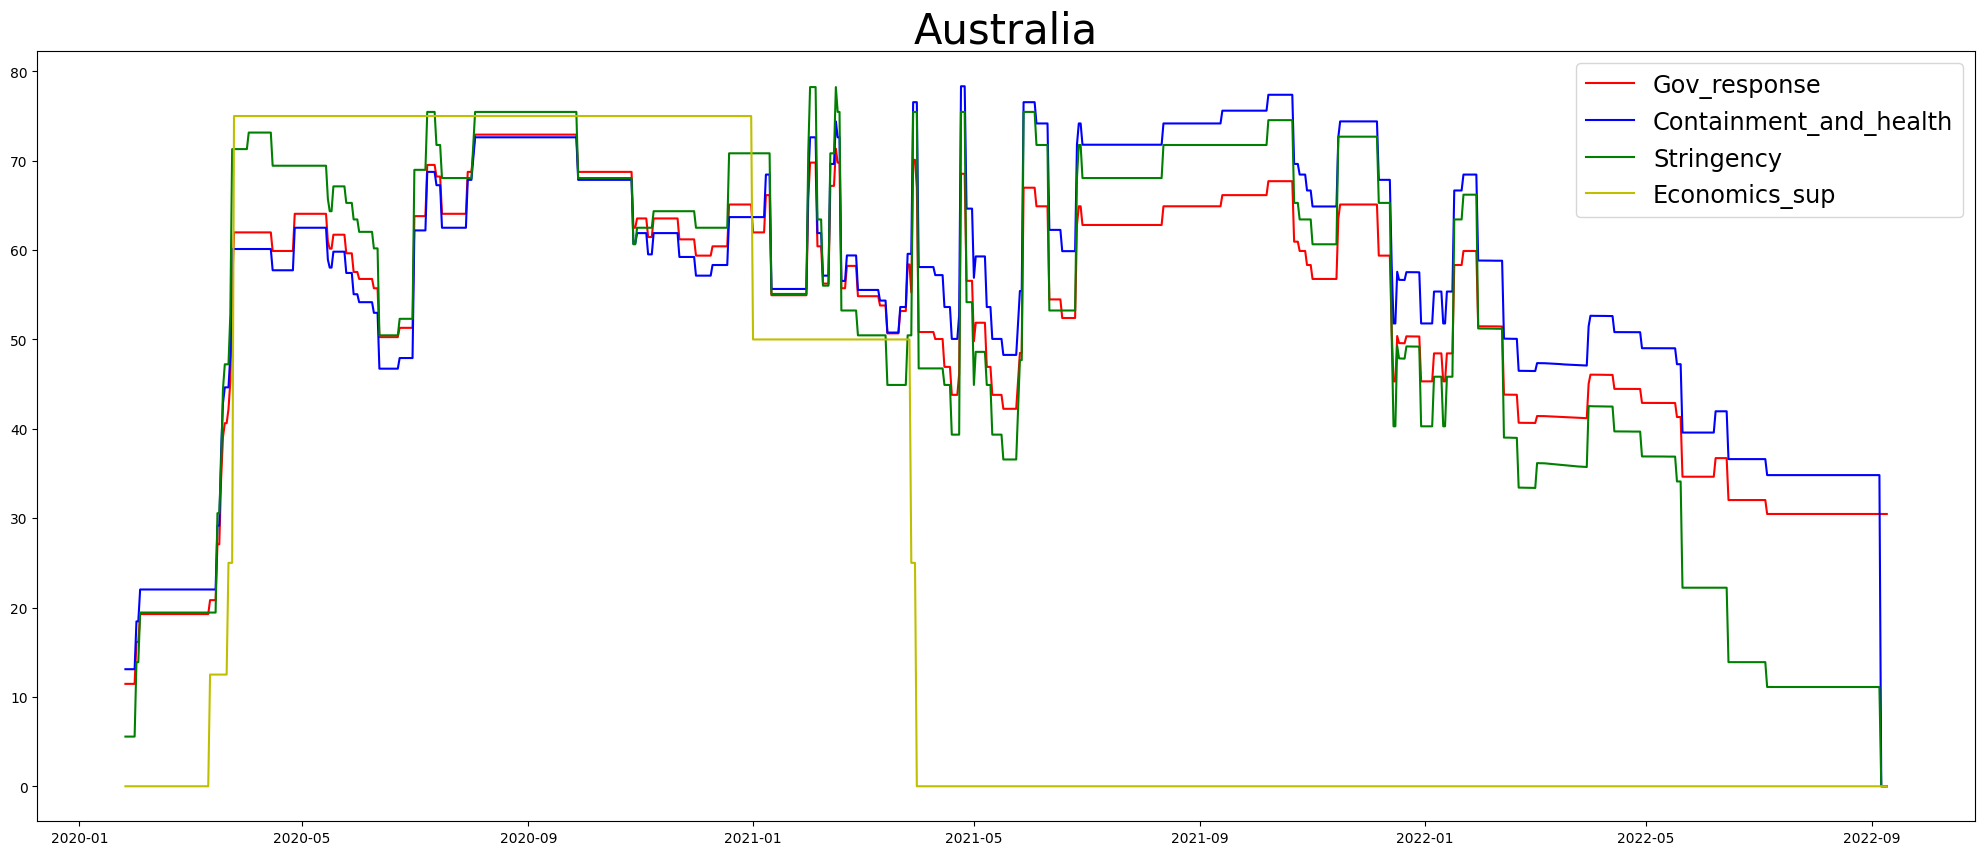

In [17]:
# Visualization Indexs
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['gov_response']], color = 'r')
plt.plot(x, country_index[['containment_and_health']], color = 'b')
plt.plot(x, country_index[['stringency']], color = 'g')
plt.plot(x, country_index[['economics_sup']], color = 'y')
plt.title(country, fontsize=30)
plt.legend(['Gov_response','Containment_and_health','Stringency','Economics_sup'], fontsize='xx-large');

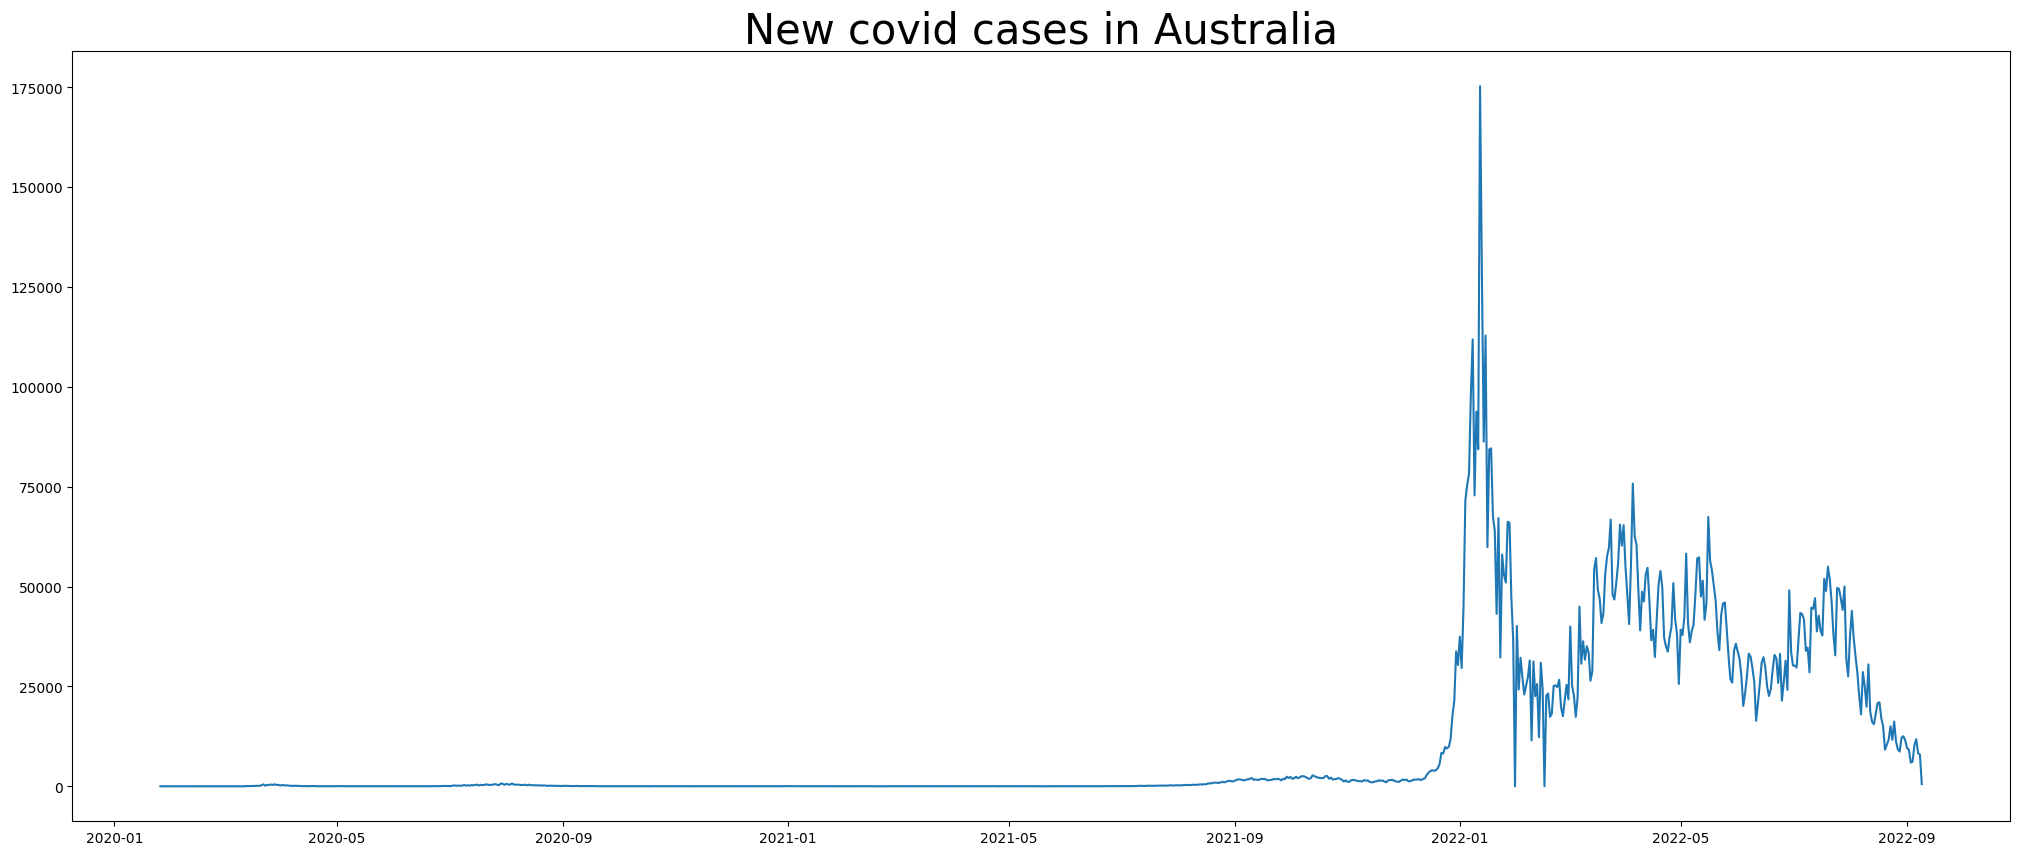

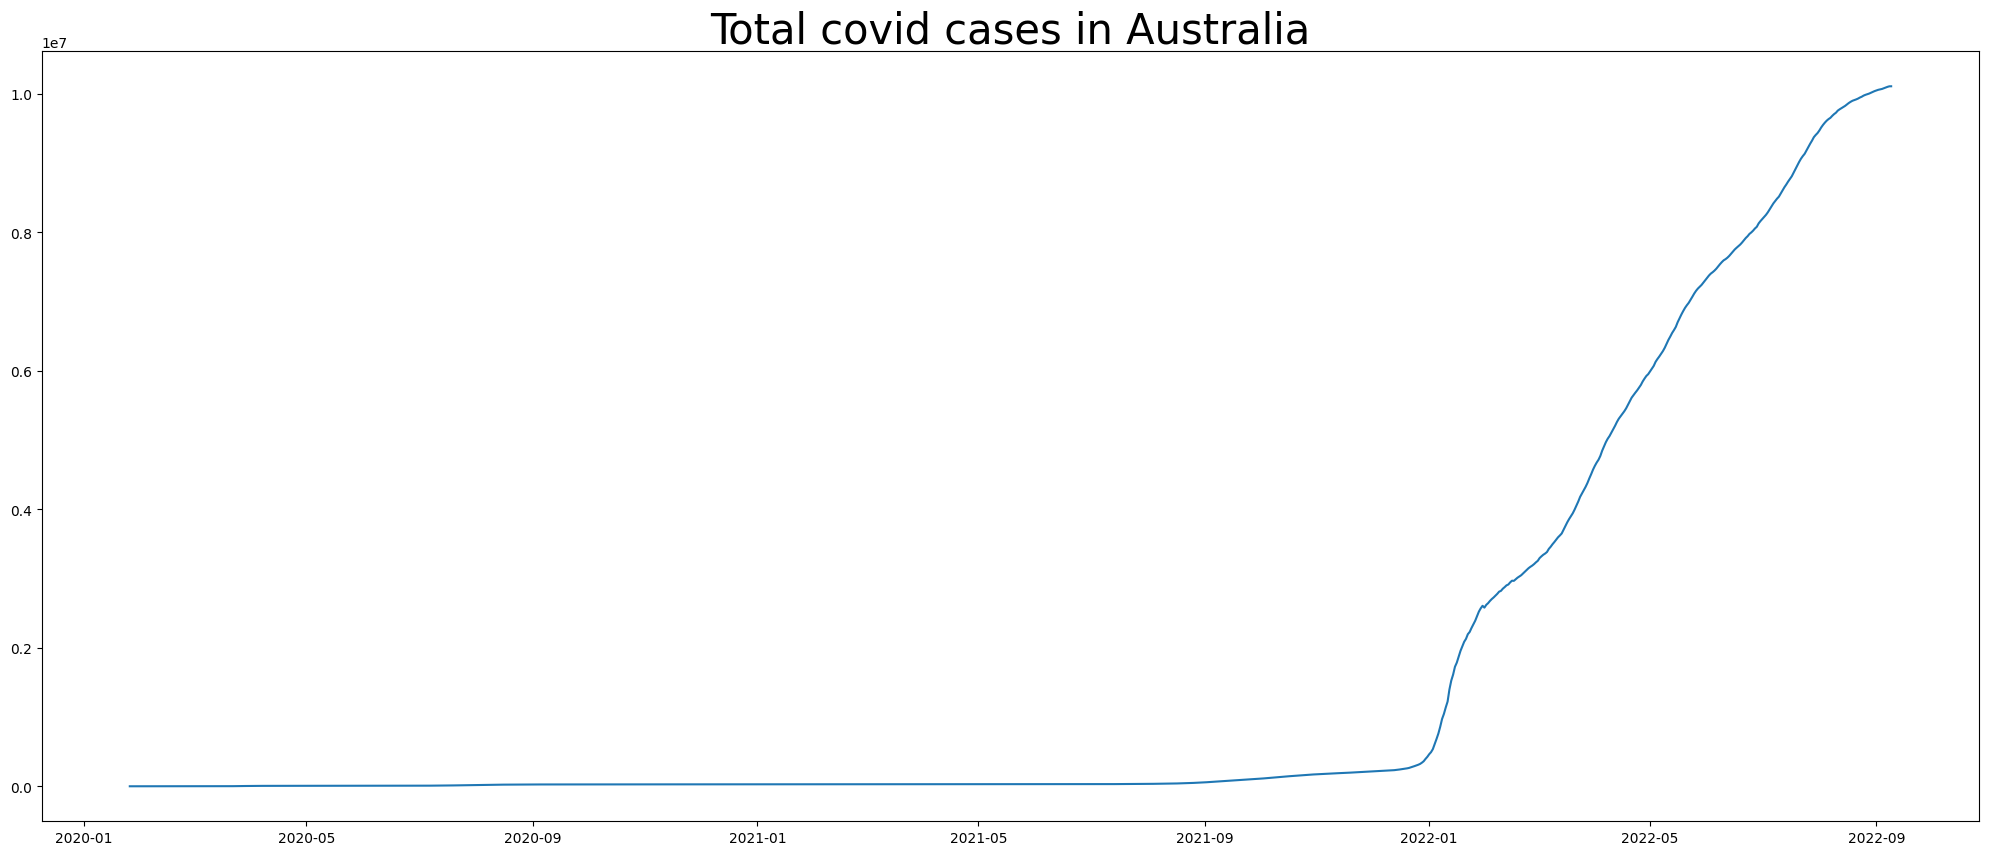

In [19]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

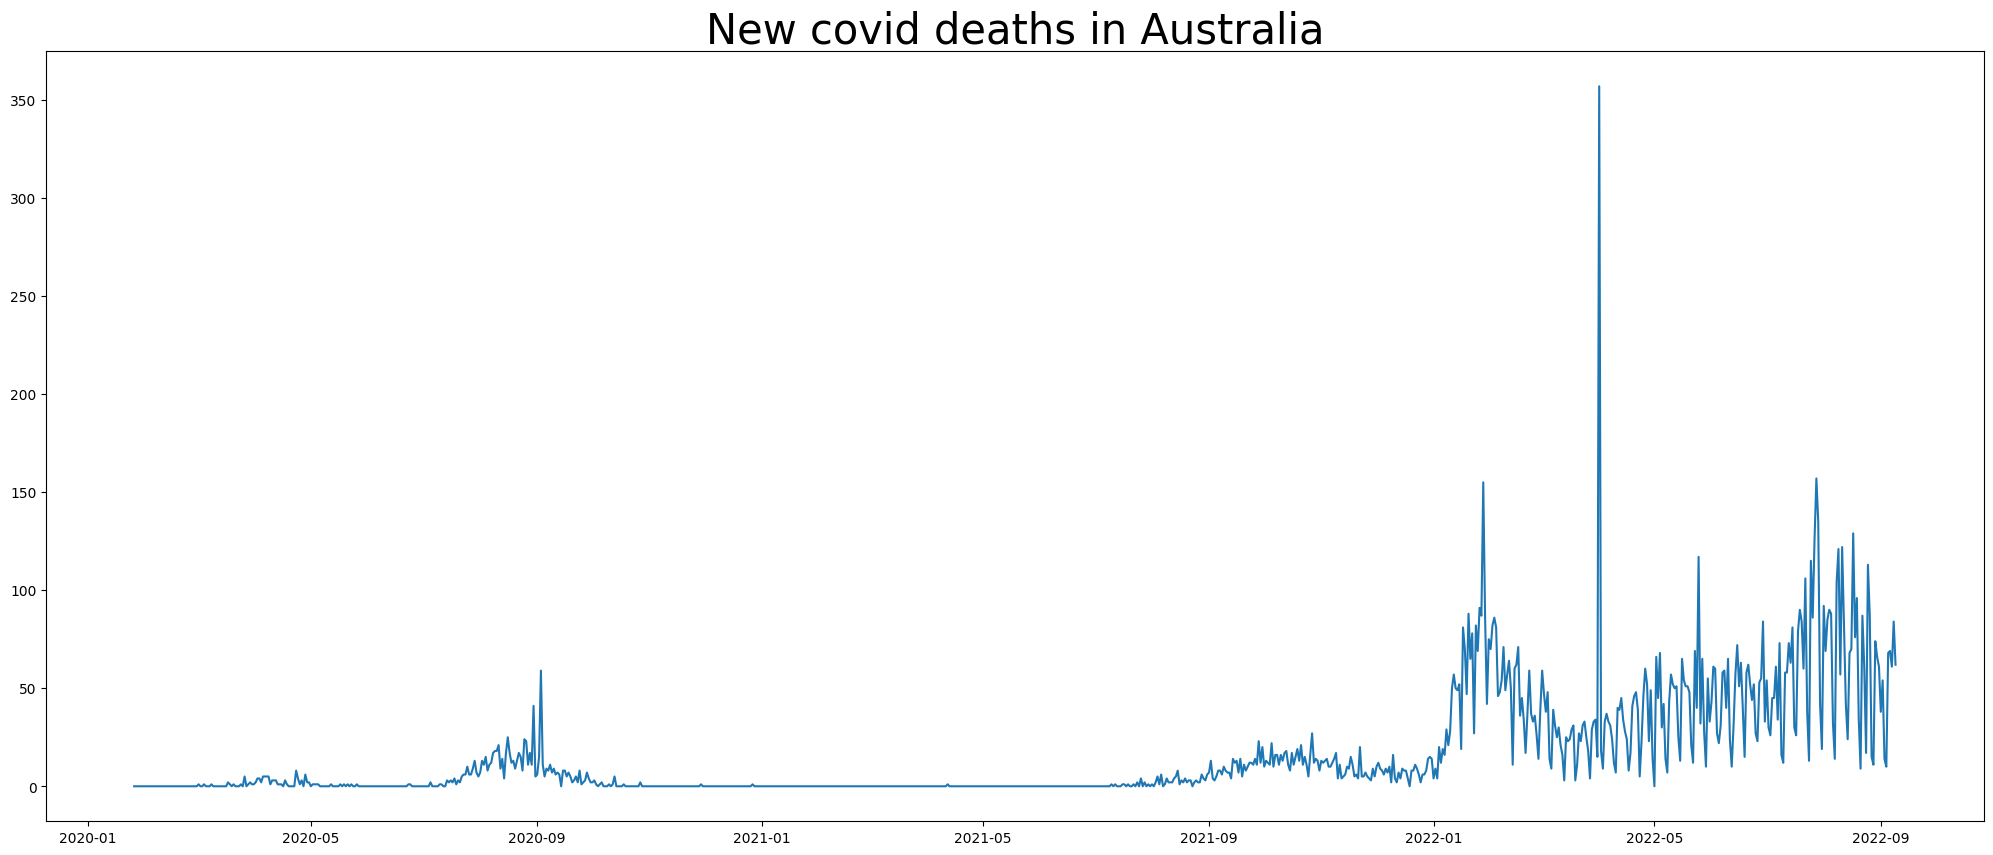

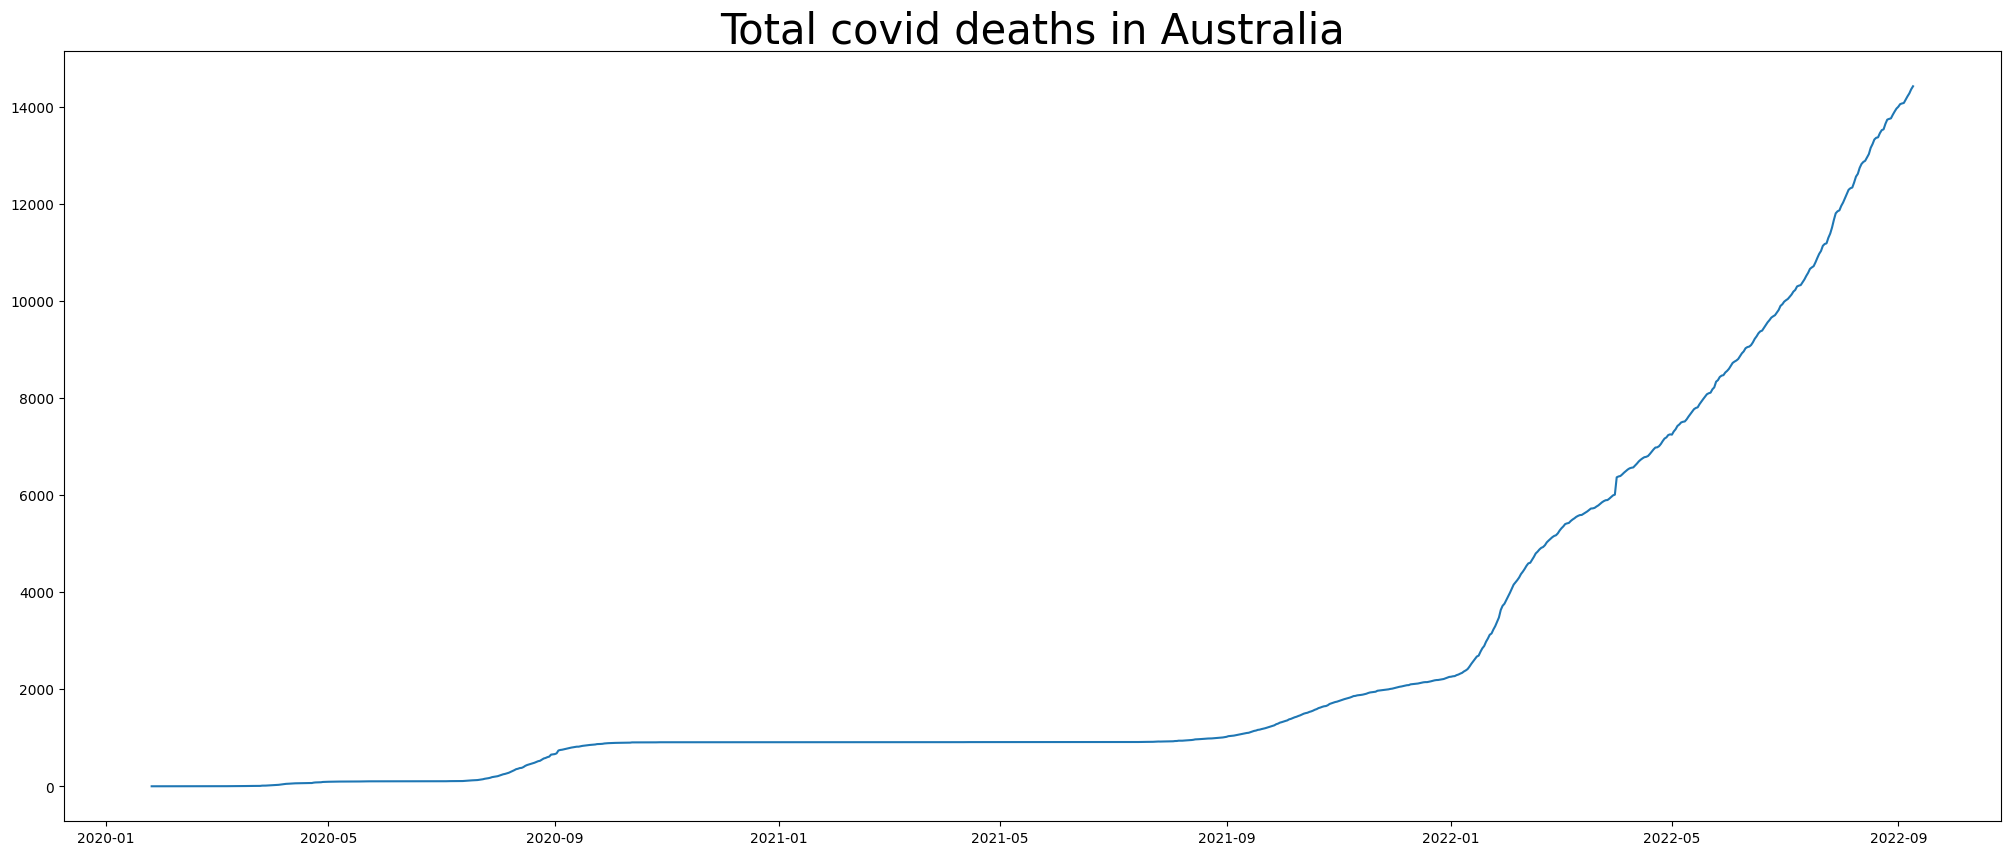

In [20]:
# Visualization new deaths
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_deaths']]);
plt.title(f'New covid deaths in {country}', fontsize=30)

# Visualization total deaths
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_deaths']]);
plt.title(f'Total covid deaths in {country}', fontsize=30);

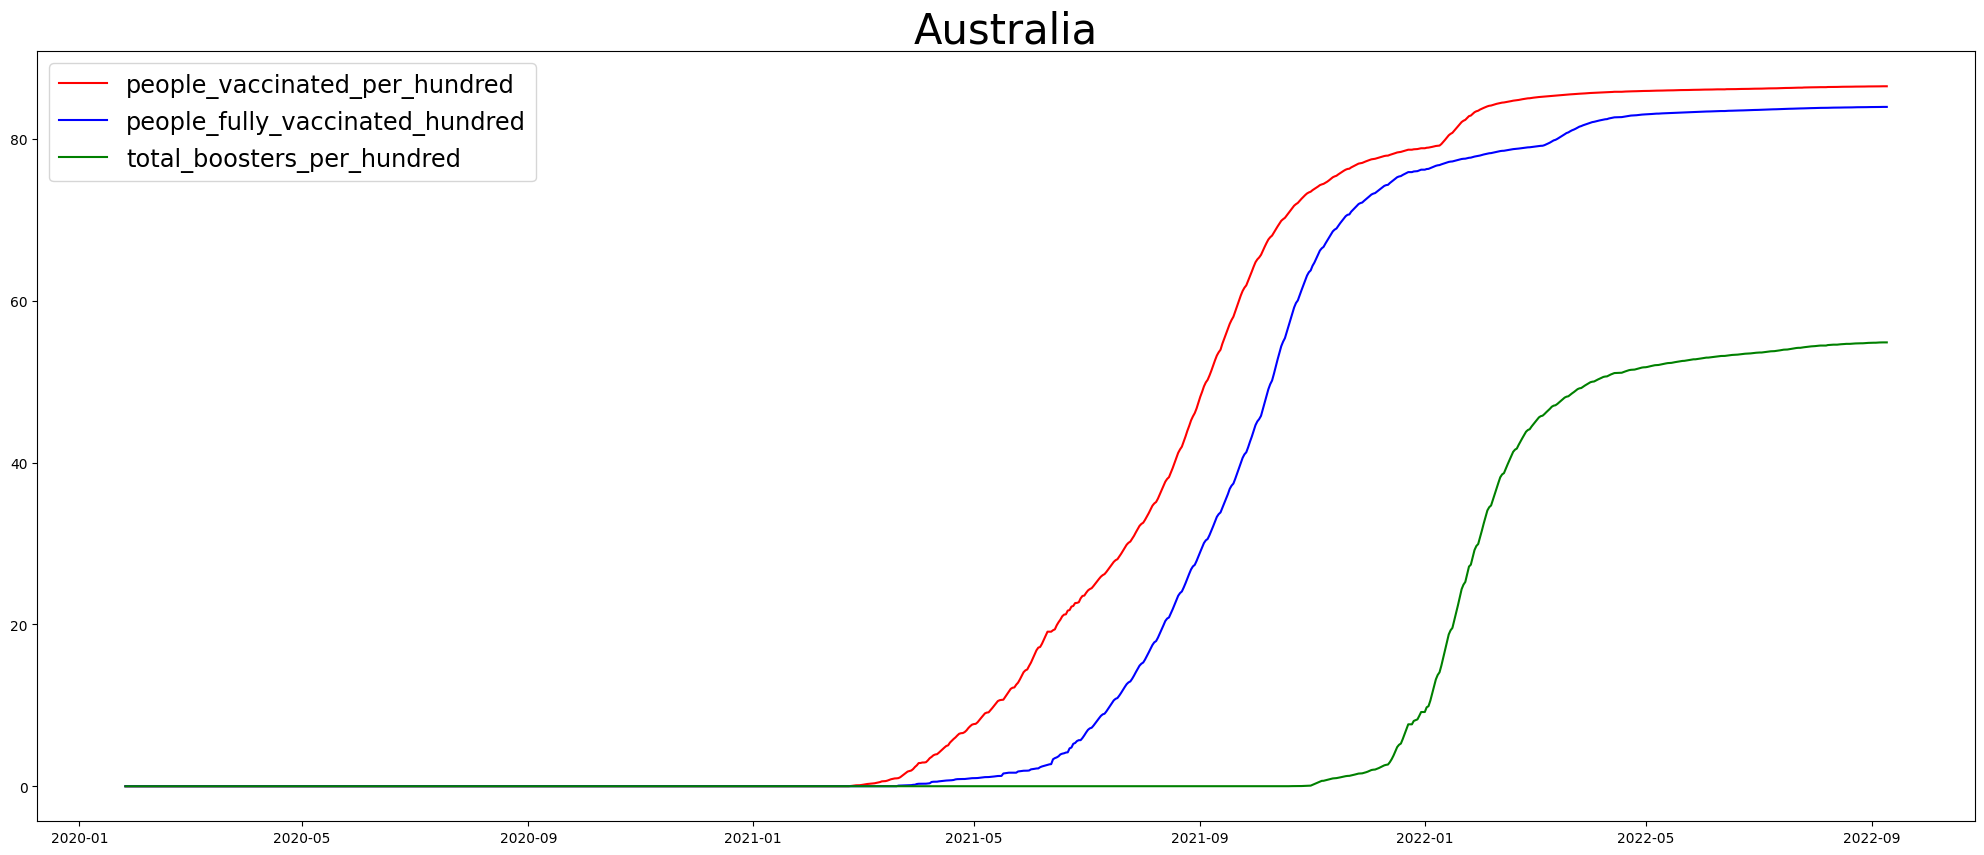

In [21]:
# Visualization Vaccination 

x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['people_vaccinated_per_hundred']], color = 'r')
plt.plot(x, country_index[['people_fully_vaccinated_per_hundred']], color = 'b')
plt.plot(x, country_index[['total_boosters_per_hundred']], color = 'g')
plt.title(country, fontsize=30)
plt.legend(['people_vaccinated_per_hundred','people_fully_vaccinated_hundred','total_boosters_per_hundred'], fontsize='xx-large');

In [22]:
data_countries = {}

countries = df_cases.columns
countries = countries.drop(['Turkmenistan'])

for country in countries:
    data_countries[country] = country_output(country)[1]
    print(country)

Aruba
Afghanistan
Angola
Albania
Andorra
United Arab Emirates
Argentina
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Democratic Republic of Congo
Congo
Colombia
Comoros
Cape Verde
Costa Rica
Cuba
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
France
Faeroe Islands
Gabon
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
Georgia
Ghana
Guinea
Gambia
Greece
Grenada
Greenland
Guatemala
Guam
Guyana
Hong Kong
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Isra

In [23]:
USA = data_countries['United States']

## ML PREPROCESSING

In [19]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
USA

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,...,facial_coverings,vaccination_policy,protection_of_elderly_people,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.00,0.00,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.00,0.00,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2022-09-05,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,5.0,2.0,94763594.0,20098.0,1047696.0,71.0,79.24,67.58,39.5
958,2022-09-06,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,5.0,2.0,94873418.0,109824.0,1048287.0,591.0,79.24,67.58,39.5
959,2022-09-07,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,5.0,2.0,94996088.0,122670.0,1049075.0,788.0,79.24,67.58,39.5
960,2022-09-08,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,5.0,2.0,95119445.0,123357.0,1049749.0,674.0,79.24,67.58,39.5


In [173]:
X = USA.drop(columns = ['date','new_cases', 'new_deaths', 'total_deaths'])
y = USA['total_deaths']

In [28]:
## Manualmente de o al 80% 

train = int((len(USA)*0.8))

X_train = X[:train]
y_train = y[:train]

X_test = X[train:]
y_test = y[train:]

len(X_train), len(X_test), len(y_train), len(y_test)

(769, 193, 769, 193)

In [33]:
# Standarization
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))

X_test = pd.DataFrame(scaler.transform(X_test))

In [184]:
X = USA.drop(columns = ['date','new_cases', 'new_deaths', 'total_deaths'])
y = USA['total_deaths']

data_confirmed_cases_days = X['total_cases']

data_confirmed_cases_days = pd.concat([data_confirmed_cases_days,data_confirmed_cases_days.shift(periods=1)], axis=1)
data_confirmed_cases_days = pd.concat([data_confirmed_cases_days,data_confirmed_cases_days.shift(periods=2)], axis=1)
data_confirmed_cases_days = pd.concat([data_confirmed_cases_days,data_confirmed_cases_days.shift(periods=4)], axis=1)

name_list = ['total_cases']

for day in range(1,data_confirmed_cases_days.shape[1]):
    name_list.append(f'day-{day}')

name_list
data_confirmed_cases_days.columns = name_list

X_new = X.merge(data_confirmed_cases_days, on='total_cases')

X_new = X_new.dropna().reset_index(drop=True)

X_new.tail(11)

,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,day-1,day-2,day-3,day-4,day-5,day-6,day-7
1068,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.22,67.56,39.47,94316154.0,94210812.0,94202606.0,94191047.0,94070255.0,93930847.0,93779096.0
1069,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.23,67.57,39.48,94391235.0,94316154.0,94210812.0,94202606.0,94191047.0,94070255.0,93930847.0
1070,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.57,39.49,94544749.0,94391235.0,94316154.0,94210812.0,94202606.0,94191047.0,94070255.0
1071,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.49,94662125.0,94544749.0,94391235.0,94316154.0,94210812.0,94202606.0,94191047.0
1072,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.50,94726258.0,94662125.0,94544749.0,94391235.0,94316154.0,94210812.0,94202606.0
1073,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.50,94737334.0,94726258.0,94662125.0,94544749.0,94391235.0,94316154.0,94210812.0
1074,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.50,94743496.0,94737334.0,94726258.0,94662125.0,94544749.0,94391235.0,94316154.0
1075,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.50,94763594.0,94743496.0,94737334.0,94726258.0,94662125.0,94544749.0,94391235.0
1076,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.50,94873418.0,94763594.0,94743496.0,94737334.0,94726258.0,94662125.0,94544749.0
1077,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,79.24,67.58,39.50,94996088.0,94873418.0,94763594.0,94743496.0,94737334.0,94726258.0,94662125.0


In [41]:
from covid_time_series_prediction.ml_logic.preprocessor import scaler 
from covid_time_series_prediction.ml_logic.model import train_test_set_ml

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.multioutput import MultiOutputRegressor

from xgboost import XGBRegressor

import matplotlib.pyplot as plt

In [57]:
X_train, y_train, X_test, y_test = train_test_set('France')

In [65]:
X_train_1, y_train_1, X_test_1, y_test_1 = X_train, y_train, X_test, y_test 

In [60]:
X_train_1.shape, y_train_1.shape

((768, 20), (768,))

/Users/albertogutierrez/.pyenv/versions/3.8.12/envs/covid_env/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/albertogutierrez/.pyenv/versions/3.8.12/envs/covid_env/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best Validation Score 10349.698260655181


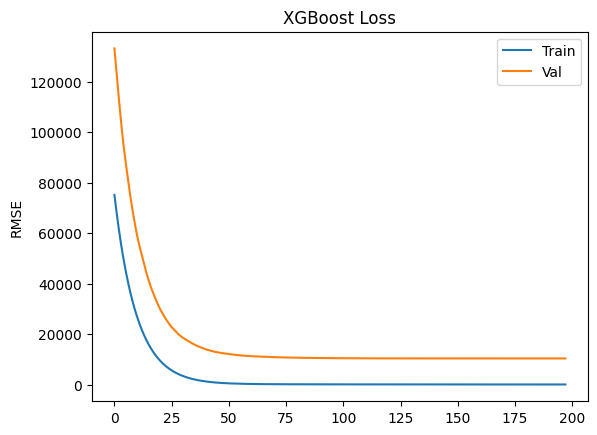

In [62]:
model_xgb = XGBRegressor(max_depth=10, n_estimators=300, learning_rate=0.1)

model_xgb.fit(X_train_1, y_train_1,
        verbose=False,
        eval_set=[(X_train_1, y_train_1), (X_test_1, y_test_1)],
        eval_metric=["rmse"],
        early_stopping_rounds=10)

# retrieve performance metrics
results = model_xgb.evals_result()
epochs = len(results['validation_0']["rmse"])
x_axis = range(0, epochs)

# plot rmsle loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
ax.legend(); plt.ylabel('RMSE'); plt.title('XGBoost Loss')

print("Best Validation Score", min(results['validation_1']['rmse']))

In [64]:
X_train_1.shape

(768, 20)

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X_train_1, y_train_1 = make_regression(n_features=6, n_targets=6)

gsc = GridSearchCV(
            estimator=MultiOutputRegressor(XGBRegressor()),
            param_grid={"estimator__learning_rate": (0.05, 0.10, 0.15)},
            cv=3, scoring='', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train_1, y_train_1)
print(grid_result.best_params_)

{'estimator__learning_rate': 0.15}


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

def get_csv():

    # Index URLs
    url_index_strigency = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/stringency_index_avg.csv'
    url_index_gov_response = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/government_response_index_avg.csv'
    url_index_health = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/containment_health_index_avg.csv'
    url_index_economic = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/economic_support_index.csv'

    # Indicators URLs
    # C sub-indicators
    url_c1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c1m_school_closing.csv'
    url_c2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c2m_workplace_closing.csv'
    url_c3 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c3m_cancel_public_events.csv'
    url_c4 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c4m_restrictions_on_gatherings.csv'
    url_c5 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c5m_close_public_transport.csv'
    url_c6 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c6m_stay_at_home_requirements.csv'
    url_c7 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c7m_movementrestrictions.csv'
    url_c8 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c8ev_internationaltravel.csv'

    # E sub-indicators
    url_e1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e1_income_support.csv'
    url_e2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e2_debtrelief.csv'

    # H sub-indicators
    url_h1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h1_public_information_campaigns.csv'
    url_h2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h2_testing_policy.csv'
    url_h3 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h3_contact_tracing.csv'
    url_h6 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h6m_facial_coverings.csv'
    url_h7 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h7_vaccination_policy.csv'
    url_h8 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h8m_protection_of_elderly_ppl.csv'

     # Vacination Dataset
    url_vaccination = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
    
    # Target URLs
    url_cases = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_cases.csv'
    url_deaths = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_deaths.csv'

    # DataFrame Index
    
    df_gov_response_raw = pd.read_csv(url_index_gov_response)
    df_strigency_raw = pd.read_csv(url_index_strigency)
    df_health_raw = pd.read_csv(url_index_health)
    df_economic_raw = pd.read_csv(url_index_economic)

    # DataFrames Indicator
    df_c1_raw = pd.read_csv(url_c1)
    df_c2_raw = pd.read_csv(url_c2)
    df_c3_raw = pd.read_csv(url_c3)
    df_c4_raw = pd.read_csv(url_c4)
    df_c5_raw = pd.read_csv(url_c5)
    df_c6_raw = pd.read_csv(url_c6)
    df_c7_raw = pd.read_csv(url_c7)
    df_c8_raw = pd.read_csv(url_c8)

    df_e1_raw = pd.read_csv(url_e1)
    df_e2_raw = pd.read_csv(url_e2)

    df_h1_raw = pd.read_csv(url_h1)
    df_h2_raw = pd.read_csv(url_h2)
    df_h3_raw = pd.read_csv(url_h3)
    df_h6_raw = pd.read_csv(url_h6)
    df_h7_raw = pd.read_csv(url_h7)
    df_h8_raw = pd.read_csv(url_h8)
    
    # DataFrame Vaccination
    df_vaccination_raw = pd.read_csv(url_vaccination)

    # Data Frame target
    df_cases_raw = pd.read_csv(url_cases)
    df_deaths_raw = pd.read_csv(url_deaths)
    
    # Crear lista con los df_raw
    
    df_raw_list = [df_gov_response_raw, df_strigency_raw, df_health_raw,df_economic_raw,
               df_c1_raw,df_c2_raw,df_c3_raw,df_c4_raw,df_c5_raw,df_c6_raw,df_c7_raw,df_c8_raw,df_e1_raw,df_e2_raw,
               df_h1_raw,df_h2_raw,df_h3_raw,df_h6_raw,df_h7_raw,df_h8_raw,
               df_vaccination_raw,
               df_cases_raw,df_deaths_raw]
    
    return df_raw_list

# Cleaninng Features

def clean_data():
    
    df_gov_response_raw, df_strigency_raw, df_health_raw, df_economic_raw, df_c1_raw, df_c2_raw, df_c3_raw, df_c4_raw, df_c5_raw,df_c6_raw,df_c7_raw,df_c8_raw,df_e1_raw,df_e2_raw,df_h1_raw,df_h2_raw,df_h3_raw,df_h6_raw,df_h7_raw,df_h8_raw,df_vaccination_raw,df_cases_raw,df_deaths_raw = get_csv()

    drop_columns = ['Unnamed: 0','country_code','region_code','region_name','jurisdiction']

    df_gov_response = df_gov_response_raw.drop(columns = drop_columns)
    df_gov_response.set_index(keys='country_name', inplace=True)
    df_gov_response = df_gov_response.T
    df_gov_response = df_gov_response.fillna(0)

    df_health = df_health_raw.drop(columns = drop_columns)
    df_health.set_index(keys='country_name', inplace=True)
    df_health = df_health.T
    df_health = df_health.fillna(0)

    df_strigency = df_strigency_raw.drop(columns = drop_columns)
    df_strigency.set_index(keys='country_name', inplace=True)
    df_strigency = df_strigency.T
    df_strigency = df_strigency.fillna(0)

    df_economic = df_economic_raw.drop(columns = drop_columns)
    df_economic.set_index(keys='country_name', inplace=True)
    df_economic = df_economic.T
    df_economic = df_economic.fillna(0)

    # Cleaning Indicators

    df_c1 = df_c1_raw.copy()
    df_c1 = df_c1.drop(columns = drop_columns)
    df_c1.set_index(keys='country_name', inplace=True)
    df_c1 = df_c1.T

    df_c2 = df_c2_raw.copy()
    df_c2 = df_c2.drop(columns = drop_columns)
    df_c2.set_index(keys='country_name', inplace=True)
    df_c2 = df_c2.T

    df_c3 = df_c3_raw.copy()
    df_c3 = df_c3.drop(columns = drop_columns)
    df_c3.set_index(keys='country_name', inplace=True)
    df_c3 = df_c3.T

    df_c4 = df_c4_raw.copy()
    df_c4 = df_c4.drop(columns = drop_columns)
    df_c4.set_index(keys='country_name', inplace=True)
    df_c4 = df_c4.T

    df_c5 = df_c5_raw.copy()
    df_c5 = df_c5.drop(columns = drop_columns)
    df_c5.set_index(keys='country_name', inplace=True)
    df_c5 = df_c5.T

    df_c6 = df_c6_raw.copy()
    df_c6 = df_c6.drop(columns = drop_columns)
    df_c6.set_index(keys='country_name', inplace=True)
    df_c6 = df_c6.T

    df_c7 = df_c7_raw.copy()
    df_c7 = df_c7.drop(columns = drop_columns)
    df_c7.set_index(keys='country_name', inplace=True)
    df_c7 = df_c7.T

    df_c8 = df_c8_raw.copy()
    df_c8 = df_c8.drop(columns = drop_columns)
    df_c8.set_index(keys='country_name', inplace=True)
    df_c8 = df_c8.T

    df_e1 = df_e1_raw.copy()
    df_e1 = df_e1.drop(columns = drop_columns)
    df_e1.set_index(keys='country_name', inplace=True)
    df_e1 = df_e1.T

    df_e2 = df_e2_raw.copy()
    df_e2 = df_e2.drop(columns = drop_columns)
    df_e2.set_index(keys='country_name', inplace=True)
    df_e2 = df_e2.T

    df_h1 = df_h1_raw.copy()
    df_h1 = df_h1.drop(columns = drop_columns)
    df_h1.set_index(keys='country_name', inplace=True)
    df_h1 = df_h1.T

    df_h2 = df_h2_raw.copy()
    df_h2 = df_h2.drop(columns = drop_columns)
    df_h2.set_index(keys='country_name', inplace=True)
    df_h2 = df_h2.T

    df_h3 = df_h3_raw.copy()
    df_h3 = df_h3.drop(columns = drop_columns)
    df_h3.set_index(keys='country_name', inplace=True)
    df_h3 = df_h3.T

    df_h6 = df_h6_raw.copy()
    df_h6 = df_h6.drop(columns = drop_columns)
    df_h6.set_index(keys='country_name', inplace=True)
    df_h6 = df_h6.T

    df_h7 = df_h7_raw.copy()
    df_h7 = df_h7.drop(columns = drop_columns)
    df_h7.set_index(keys='country_name', inplace=True)
    df_h7 = df_h7.T

    df_h8 = df_h8_raw.copy()
    df_h8 = df_h8.drop(columns = drop_columns)
    df_h8.set_index(keys='country_name', inplace=True)
    df_h8 = df_h8.T

    # Cleaning Vaccination Features
    df_vaccination = df_vaccination_raw.copy()
    df_vaccination = df_vaccination[['date','location','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred']]

    # Cleaninng Target

    # Cases per country
    df_cases = df_cases_raw.drop(columns = drop_columns)
    df_cases.set_index(keys='country_name', inplace=True)
    df_cases = df_cases.T
    df_cases = df_cases.fillna(0)

    # Deaths per country
    df_deaths = df_deaths_raw.drop(columns = drop_columns)
    df_deaths.set_index(keys='country_name', inplace=True)
    df_deaths = df_deaths.T
    df_deaths = df_deaths.fillna(0)
    
    df_clean_list = [df_gov_response, df_strigency, df_health,df_economic,
               df_c1,df_c2,df_c3,df_c4,df_c5,df_c6,df_c7,df_c8,df_e1,df_e2,
               df_h1,df_h2,df_h3,df_h6,df_h7,df_h8,
               df_vaccination,
               df_cases,df_deaths]
    
    return df_clean_list
    
def country_output(country):
    
    df_gov_response, df_strigency, df_health,df_economic,df_c1,df_c2,df_c3,df_c4,df_c5,df_c6,df_c7,df_c8,df_e1,df_e2,df_h1,df_h2,df_h3,df_h6,df_h7,df_h8,df_vaccination,df_cases,df_deaths = clean_data()

    # INDEX FEATURES
    country_index = df_gov_response.copy()
    country_index = pd.DataFrame(country_index[[country]].iloc[:,0])
    country_index.index.name = country
    country_index.columns = ['gov_response']
    country_index['containment_and_health'] = df_health[[country]].iloc[:,0]
    country_index['stringency'] = df_strigency[[country]].iloc[:,0]
    country_index['economics_sup'] = df_economic[[country]].iloc[:,0]

    # INDICATOR FEATRUES
    df = pd.DataFrame(df_c1[[country]].rename(columns = {country:'school_closing'}).iloc[:,0])
    df.index.name = country
    df['workplace_closing'] = df_c2[[country]].iloc[:,0]
    df['cancel_public_events'] = df_c3[[country]].iloc[:,0]
    df['restrictions_on_gatherings'] = df_c4[[country]].iloc[:,0]
    df['close_public_transport'] = df_c5[[country]].iloc[:,0]
    df['stay_at_home_requirements'] = df_c6[[country]].iloc[:,0]
    df['restrictions_on_internal_movement'] = df_c7[[country]].iloc[:,0]
    df['international_travel_controls'] = df_c8[[country]].iloc[:,0]
    df['income_support'] = df_e1[[country]].iloc[:,0]
    df['debt/contract_relief'] = df_e2[[country]].iloc[:,0]
    df['public_information_campaigns'] = df_h1[[country]].iloc[:,0]
    df['testing_policy'] = df_h2[[country]].iloc[:,0]
    df['contact_tracing'] = df_h3[[country]].iloc[:,0]
    df['facial_coverings'] = df_h6[[country]].iloc[:,0]
    df['vaccination_policy'] = df_h7[[country]].iloc[:,0]
    df['protection_of_elderly_people'] = df_h8[[country]].iloc[:,0]
    df = df.fillna(method = 'ffill')
    country_indicator = df
    
    # POPULATION VACCINATED
    country_vaccination = df_vaccination.loc[df_vaccination['location']==country]
    country_vaccination = country_vaccination.fillna(method='ffill').drop(columns = 'location')
    country_vaccination.index.name = country
    country_vaccination = country_vaccination.fillna(0)

    # TARGET
    country_target = df_cases.copy()
    country_target = pd.DataFrame(country_target[[country]].iloc[:,0])
    country_target.index.name = country
    country_target.columns = ['total_cases']
    country_target['new_cases'] = country_target - country_target.shift(1)
    country_target['total_deaths'] = df_deaths[[country]].iloc[:,0]
    country_target['new_deaths'] = df_deaths[[country]].iloc[:,0] - df_deaths[[country]].iloc[:,0].shift(1)

    country_target['new_cases'].loc[country_target['new_cases'] < 0] = 0
    country_target['new_deaths'].loc[country_target['new_deaths'] < 0] = 0

    # DAYS NO UPDATED DATA
    def non_uptade(country_target):

        counter = 0
        x = 1
        while country_target['total_deaths'][-x] == 0:
            counter += 1
            x += 1

        return counter

    counter = non_uptade(country_target)

    # LAST UPDATED DATA
    country_index = country_index[:-counter]
    country_indicator = country_indicator[:-counter]
    country_vaccination = country_vaccination[:-counter]
    country_target = country_target[:-counter]
    
    # JOIN INDEX-TARGET AND INDICATOR-TARGET
    country_index = country_index.join(country_target)
    
    country_indicator = country_indicator.join(country_target)
    
    # JOIN INDEX AND VACCINATION
    country_vaccination.reset_index(inplace=True)
    country_vaccination['date'] = pd.to_datetime(country_vaccination['date'])

    country_index.reset_index(inplace=True)
    country_index[country] = country_index[country].apply(lambda x: pd.to_datetime( x, format='%y%b%d', infer_datetime_format=True))
    
    country_index.rename(columns = {country: 'date'}, inplace = True)
    country_index = country_index.merge(country_vaccination, how = 'left' , on = 'date')

    country_index.fillna(method = 'ffill', inplace=True)
    country_index.fillna(0, inplace=True)
    country_index.drop(columns = country, inplace=True)
    
    # JOIN INDICATOR AND VACCINATION
    country_indicator.reset_index(inplace=True)
    country_indicator[country] = country_indicator[country].apply(lambda x: pd.to_datetime( x, format='%y%b%d', infer_datetime_format=True))

    country_indicator.rename(columns = {country: 'date'}, inplace = True)
    country_indicator = country_indicator.merge(country_vaccination, how = 'left' , on = 'date')

    country_indicator.fillna(method = 'ffill', inplace=True)
    country_indicator.fillna(0, inplace=True)
    country_indicator.drop(columns = country, inplace=True)
    
    # START THE SERIES WHIT THE FIRST COVID CASE REPORT IT
    country_index = country_index.loc[country_index['total_cases'] > 0].reset_index(drop=True)
    country_indicator = country_indicator.loc[country_indicator['total_cases'] > 0].reset_index(drop=True)
    
    return country_index, country_indicator

TypeError: get_params() missing 1 required positional argument: 'self'

In [ ]:
import pandas as pd
import numpy as np

from covid_time_series_prediction.ml_logic.preprocessor import scaler

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

import xgboost as xgb


def concat(country):
    
    X, y = scaler(country)
    data_confirmed_cases_days = X['total_cases']

    data_confirmed_cases_days = pd.concat([data_confirmed_cases_days,data_confirmed_cases_days.shift(periods=1)], axis=1)
    data_confirmed_cases_days = pd.concat([data_confirmed_cases_days,data_confirmed_cases_days.shift(periods=2)], axis=1)
    data_confirmed_cases_days = pd.concat([data_confirmed_cases_days,data_confirmed_cases_days.shift(periods=4)], axis=1)

    columns_names = ['confirmed_case']

    for day in range(1,data_confirmed_cases_days.shape[1]):
        columns_names.append(f'day-{day}')

    data_confirmed_cases_days.columns = columns_names

    X_new = X.merge(data_confirmed_cases_days, on='total_cases')

    X_new = X_new.dropna().reset_index(drop=True)
                        
    return X_new, y

def train_test_set_ml(country, split_train=0.8, split_val=0):
    
    X, y = concat(country)
    
    train = int((len(X)*split_train))
    val = int(len(X)*split_val)

    X_train = X[:train]
    y_train = y[:train]
    
    if split_val <= split_train:  
        X_test = X[train:]
        y_test = y[train:]
        return X_train, y_train, X_test, y_test
    
    X_val = X[train:val]
    y_val = y[train:val]

    X_test = X[val:]
    y_test = y[val:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

def model_ml(country):
    
    X_train, y_train, X_test, y_test = train_test_set_ml(country)
    
    model_xgb = XGBRegressor(max_depth=10, n_estimators=300, learning_rate=0.1)

    model_xgb.fit(X_train, y_train,
            verbose=True,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric=["rmse"],
            early_stopping_rounds=10)

    # retrieve performance metrics
    results = model_xgb.evals_result()
    epochs = len(results['validation_0']["rmse"])
    x_axis = range(0, epochs)

    # plot rmsle loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
    ax.plot(x_axis, results['validation_1']['rmse'], label='Val')
    ax.legend(); plt.ylabel('RMSE (of log)'); plt.title('XGBoost Log Loss')

    print("Best Validation Score", min(results['validation_1']['rmse']))
    
    gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7]},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = MultiOutputRegressor(gsc).fit(X_train, y_train)
    
    return grid_result.best_params_
    

In [ ]:
rom covid_time_series_prediction.ml_logic.country_data import country_output

from sklearn.preprocessing import MinMaxScaler


def scaler(country):
    
    country_indicator = country_output(country)[1]
    
    X = country_indicator.drop(columns = ['date','new_cases', 'new_deaths', 'total_deaths'])
    
    y = country_indicator['total_deaths']
    
    scaler = MinMaxScaler()
    
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y


def train_test_set(country, split_train=0.8, split_val=0):
    
    X, y = scaler(country)
    
    train = int((len(X)*split_train))
    val = int(len(X)*split_val)

    X_train = X[:train]
    y_train = y[:train]
    
    if split_val <= split_train:  
        X_test = X[train:]
        y_test = y[train:]
        return X_train, y_train, X_test, y_test
    
    X_val = X[train:val]
    y_val = y[train:val]

    X_test = X[val:]
    y_test = y[val:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test


